In [1]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.6.0


In [2]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [3]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2960 - accuracy: 0.9144 - val_loss: 0.1380 - val_accuracy: 0.9596
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1415 - accuracy: 0.9575 - val_loss: 0.1024 - val_accuracy: 0.9689
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1063 - accuracy: 0.9677 - val_loss: 0.0914 - val_accuracy: 0.9731
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0859 - accuracy: 0.9735 - val_loss: 0.0759 - val_accuracy: 0.9771
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0757 - accuracy: 0.9765 - val_loss: 0.0716 - val_accuracy: 0.9786
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0648 - accuracy: 0.9794 - val_loss: 0.0701 - val_accuracy: 0.9786
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0591 - accuracy: 0.9808 - val_loss: 0.0713 - val_accuracy:

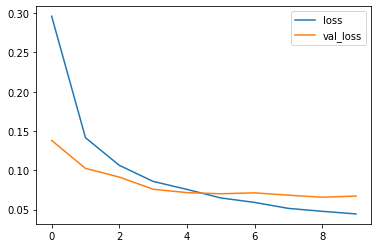

In [6]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

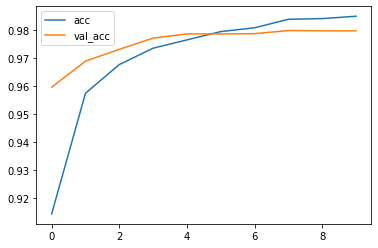

In [7]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [8]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0672 - accuracy: 0.9797
[0.0672135204076767, 0.9797000288963318]


In [9]:
# Convert the model to TFLite format

# Create a converter object
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Convert the model
tflite_model = converter.convert()

# Save to file
with open("converted_model.tflite", "wb") as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpoaccc50r/assets


In [10]:
# Check if it exists
!ls

converted_model.tflite	sample_data
